In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer
from pyspark.sql.functions import *
from pyspark.sql.functions import col
from pyspark.sql.functions import corr

# Create a SparkSession
spark = SparkSession.builder.appName("ReadCSV").getOrCreate()

# Read the CSV file into a DataFrame
df = spark.read.csv("uber-raw-data-aug14.csv", header=True, inferSchema=True)
df.printSchema()
df.show()
print(df.count())

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/05/13 02:20:37 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


root
 |-- Date/Time: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Lon: double (nullable = true)
 |-- Base: string (nullable = true)

+----------------+-------+--------+------+
|       Date/Time|    Lat|     Lon|  Base|
+----------------+-------+--------+------+
|8/1/2014 0:03:00|40.7366|-73.9906|B02512|
|8/1/2014 0:09:00| 40.726|-73.9918|B02512|
|8/1/2014 0:12:00|40.7209|-74.0507|B02512|
|8/1/2014 0:12:00|40.7387|-73.9856|B02512|
|8/1/2014 0:12:00|40.7323|-74.0077|B02512|
|8/1/2014 0:13:00|40.7349|-74.0033|B02512|
|8/1/2014 0:15:00|40.7279|-73.9542|B02512|
|8/1/2014 0:17:00| 40.721|-73.9937|B02512|
|8/1/2014 0:19:00|40.7195| -74.006|B02512|
|8/1/2014 0:20:00|40.7448|-73.9799|B02512|
|8/1/2014 0:21:00|40.7399|-74.0057|B02512|
|8/1/2014 0:25:00|40.7651|-73.9683|B02512|
|8/1/2014 0:27:00|40.7354|-74.0081|B02512|
|8/1/2014 0:29:00|40.7339|-74.0028|B02512|
|8/1/2014 0:29:00|40.7364|-74.0301|B02512|
|8/1/2014 0:29:00|40.7364|-74.0301|B02512|
|8/1/2014 0:30:00|40.7252|-73.

829275


In [2]:
df.dropna(how='any', thresh=None, subset=None)
df.show()
print(df.count())

+----------------+-------+--------+------+
|       Date/Time|    Lat|     Lon|  Base|
+----------------+-------+--------+------+
|8/1/2014 0:03:00|40.7366|-73.9906|B02512|
|8/1/2014 0:09:00| 40.726|-73.9918|B02512|
|8/1/2014 0:12:00|40.7209|-74.0507|B02512|
|8/1/2014 0:12:00|40.7387|-73.9856|B02512|
|8/1/2014 0:12:00|40.7323|-74.0077|B02512|
|8/1/2014 0:13:00|40.7349|-74.0033|B02512|
|8/1/2014 0:15:00|40.7279|-73.9542|B02512|
|8/1/2014 0:17:00| 40.721|-73.9937|B02512|
|8/1/2014 0:19:00|40.7195| -74.006|B02512|
|8/1/2014 0:20:00|40.7448|-73.9799|B02512|
|8/1/2014 0:21:00|40.7399|-74.0057|B02512|
|8/1/2014 0:25:00|40.7651|-73.9683|B02512|
|8/1/2014 0:27:00|40.7354|-74.0081|B02512|
|8/1/2014 0:29:00|40.7339|-74.0028|B02512|
|8/1/2014 0:29:00|40.7364|-74.0301|B02512|
|8/1/2014 0:29:00|40.7364|-74.0301|B02512|
|8/1/2014 0:30:00|40.7252|-73.9516|B02512|
|8/1/2014 0:30:00|40.7433| -73.986|B02512|
|8/1/2014 0:34:00|40.7437|-73.9884|B02512|
|8/1/2014 0:36:00|40.7406|-74.0077|B02512|
+----------

In [3]:
import datetime
import pandas as pd
from pyspark.sql.functions import to_timestamp
from pyspark.sql.functions import unix_timestamp
from pyspark.sql.functions import unix_timestamp

df = df.withColumn("timestamp", to_timestamp("Date/Time", "M/d/yyyy H:mm:ss"))
df = df.withColumn("timestamp_int", unix_timestamp("timestamp"))
df.show()
print(df)

+----------------+-------+--------+------+-------------------+-------------+
|       Date/Time|    Lat|     Lon|  Base|          timestamp|timestamp_int|
+----------------+-------+--------+------+-------------------+-------------+
|8/1/2014 0:03:00|40.7366|-73.9906|B02512|2014-08-01 00:03:00|   1406835180|
|8/1/2014 0:09:00| 40.726|-73.9918|B02512|2014-08-01 00:09:00|   1406835540|
|8/1/2014 0:12:00|40.7209|-74.0507|B02512|2014-08-01 00:12:00|   1406835720|
|8/1/2014 0:12:00|40.7387|-73.9856|B02512|2014-08-01 00:12:00|   1406835720|
|8/1/2014 0:12:00|40.7323|-74.0077|B02512|2014-08-01 00:12:00|   1406835720|
|8/1/2014 0:13:00|40.7349|-74.0033|B02512|2014-08-01 00:13:00|   1406835780|
|8/1/2014 0:15:00|40.7279|-73.9542|B02512|2014-08-01 00:15:00|   1406835900|
|8/1/2014 0:17:00| 40.721|-73.9937|B02512|2014-08-01 00:17:00|   1406836020|
|8/1/2014 0:19:00|40.7195| -74.006|B02512|2014-08-01 00:19:00|   1406836140|
|8/1/2014 0:20:00|40.7448|-73.9799|B02512|2014-08-01 00:20:00|   1406836200|

[0.754356681000442, 0.7490692429175426, 0.7378461831739248, 0.726206121181399, 0.7142041160677203, 0.7116209073126383, 0.7086216504276734]


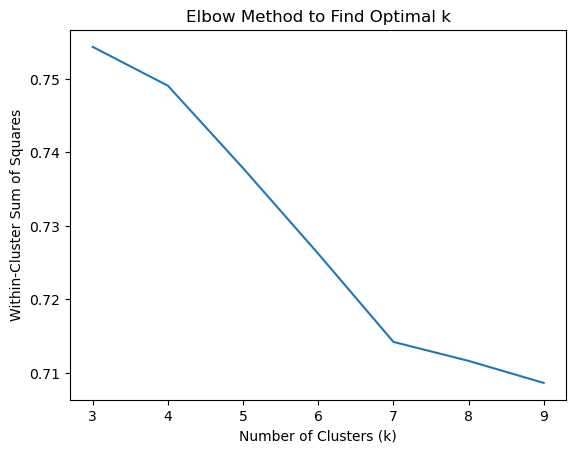

In [4]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler
import pandas as pd

assembler = VectorAssembler(inputCols =["timestamp_int", "Lat", "Lon"], outputCol='features')
output = assembler.transform(df)

# Evaluate clustering by computing Within Set Sum of Squared Errors
def computeCost(featuresData, k):
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(featuresData)
    predictions = model.transform(featuresData)
    evaluator = ClusteringEvaluator()
    cost = evaluator.evaluate(predictions)
    return cost
  
# Determine the optimal value of k using the elbow method
costs = []
for k in range(3, 10):
    cost = computeCost(output, k)
    costs.append(cost)
print(costs)
import matplotlib.pyplot as plt
plt.plot(range(3, 10), costs)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares")
plt.title("Elbow Method to Find Optimal k")
plt.show()


In [5]:
from pyspark.sql.functions import rand

print(output.count())
first_data, set_test_stream = output.randomSplit([0.8, 0.2], seed=42)
print(first_data.count(),set_test_stream.count())


829275


663586 165689


In [7]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col
from pyspark.ml.evaluation import ClusteringEvaluator
import pickle 

# Train the model on the training set
kmeans = KMeans(k=5, seed=1)
model = kmeans.fit(first_data)
predictions = model.transform(set_test_stream)
cluster_counts = predictions.groupBy('prediction').agg(count('*').alias('count'))
cluster_counts.show()
print(cluster_counts)

predictions = predictions.withColumnRenamed("Date/Time", "DateTime")

predictions = predictions.select("DateTime", "Lat", "Lon", "Base", "prediction","timestamp_int","timestamp").collect()
print(len(predictions))
# predictions.show()
# model.save("Kmodel2")

23/05/13 02:32:10 WARN MemoryStore: Not enough space to cache rdd_755_5 in memory! (computed 3.7 MiB so far)
23/05/13 02:32:10 WARN MemoryStore: Not enough space to cache rdd_755_3 in memory! (computed 3.7 MiB so far)
23/05/13 02:32:10 WARN MemoryStore: Not enough space to cache rdd_755_6 in memory! (computed 3.7 MiB so far)
23/05/13 02:32:10 WARN MemoryStore: Not enough space to cache rdd_755_1 in memory! (computed 3.7 MiB so far)
23/05/13 02:32:10 WARN MemoryStore: Not enough space to cache rdd_755_4 in memory! (computed 3.7 MiB so far)
23/05/13 02:32:10 WARN MemoryStore: Not enough space to cache rdd_755_0 in memory! (computed 3.7 MiB so far)
23/05/13 02:32:10 WARN BlockManager: Persisting block rdd_755_0 to disk instead.
23/05/13 02:32:10 WARN BlockManager: Persisting block rdd_755_1 to disk instead.
23/05/13 02:32:10 WARN BlockManager: Persisting block rdd_755_5 to disk instead.
23/05/13 02:32:10 WARN BlockManager: Persisting block rdd_755_4 to disk instead.
23/05/13 02:32:10 WARN

+----------+-----+
|prediction|count|
+----------+-----+
|         1|33270|
|         3|31046|
|         4|31207|
|         2|34248|
|         0|35918|
+----------+-----+

DataFrame[prediction: int, count: bigint]


165689


In [8]:
from cassandra.cluster import Cluster

cluster = Cluster(['127.0.0.1']) # Replace '127.0.0.1' with the IP address of your Cassandra node
session = cluster.connect()
session.execute("CREATE KEYSPACE IF NOT EXISTS uber_cassandra1 WITH replication = {'class': 'SimpleStrategy', 'replication_factor': '1'}")
# session.set_keyspace('uber_cassandra')
# predictions.show()
session.execute("DROP MATERIALIZED VIEW IF EXISTS uber_cassandra1.my_table6")
session.execute("DROP MATERIALIZED VIEW IF EXISTS uber_cassandra1.my_table5")
session.execute("DROP MATERIALIZED VIEW IF EXISTS uber_cassandra1.my_table4")
session.execute("DROP MATERIALIZED VIEW IF EXISTS uber_cassandra1.my_table3")
session.execute("DROP MATERIALIZED VIEW IF EXISTS uber_cassandra1.my_table2")
session.execute("DROP MATERIALIZED VIEW IF EXISTS uber_cassandra1.my_table1")
session.execute("DROP MATERIALIZED VIEW IF EXISTS uber_cassandra1.my_table")

session.execute("DROP TABLE IF EXISTS uber_cassandra1.my_table")
session.execute("CREATE TABLE IF NOT EXISTS uber_cassandra1.my_table (id int, timestamp_int int, Lat double, Lon double, DateTime text,Base text,prediction int,timestamp TIMESTAMP, PRIMARY KEY (id, prediction))")
index = 0
for row in predictions:
    session.execute("INSERT INTO uber_cassandra1.my_table (id, timestamp_int, Lat,Lon,Base,DateTime,prediction,timestamp) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)", (index, row[5],  row[1], row[2], row[3], row[0],row[4],row[6] ))
    index+=1


In [9]:

session.execute("DROP MATERIALIZED VIEW IF EXISTS uber_cassandra1.my_table5")

query = """
        CREATE MATERIALIZED VIEW uber_cassandra1.my_table5 AS
        SELECT *
        FROM uber_cassandra1.my_table
        WHERE id IS NOT NULL AND prediction IS NOT NULL
        PRIMARY KEY (prediction, id)
        WITH CLUSTERING ORDER BY (id ASC);
        """
session.execute(query)
rows = session.execute("""
    SELECT prediction, count(*)
    FROM uber_cassandra1.my_table5
    GROUP BY prediction
""")

# materialized_view_name = 'uber_cassandra1.my_table5'

# rows = session.execute('SELECT * FROM {}'.format(materialized_view_name))

for row in rows:
    print(row)


Row(prediction=1, count=23)
Row(prediction=0, count=37)
Row(prediction=2, count=28)
Row(prediction=4, count=27)
Row(prediction=3, count=22)


In [10]:
# first week
query = """
        SELECT DateTime , base
        FROM uber_cassandra1.my_table
        WHERE timestamp >= '2014-08-01 00:00:00' 
          AND timestamp < '2014-08-08 00:00:00'
        ALLOW FILTERING;
        """
rows = session.execute(query)
for row in rows:
    print(row)


Row(datetime='8/6/2014 11:55:00', base='B02617')
Row(datetime='8/2/2014 5:23:00', base='B02682')
Row(datetime='8/3/2014 16:16:00', base='B02617')
Row(datetime='8/6/2014 11:05:00', base='B02617')
Row(datetime='8/1/2014 6:04:00', base='B02617')
Row(datetime='8/5/2014 15:38:00', base='B02598')
Row(datetime='8/6/2014 17:24:00', base='B02617')
Row(datetime='8/7/2014 17:57:00', base='B02512')
Row(datetime='8/6/2014 7:11:00', base='B02617')
Row(datetime='8/1/2014 23:10:00', base='B02598')
Row(datetime='8/6/2014 9:08:00', base='B02617')
Row(datetime='8/2/2014 14:38:00', base='B02512')
Row(datetime='8/7/2014 10:49:00', base='B02682')
Row(datetime='8/6/2014 21:50:00', base='B02682')
Row(datetime='8/5/2014 10:09:00', base='B02598')
Row(datetime='8/6/2014 22:58:00', base='B02617')
Row(datetime='8/1/2014 17:19:00', base='B02617')
Row(datetime='8/4/2014 8:56:00', base='B02617')
Row(datetime='8/6/2014 10:05:00', base='B02617')
Row(datetime='8/5/2014 18:02:00', base='B02617')
Row(datetime='8/4/2014 17

In [11]:
# second week
query = """
        SELECT DateTime , base
        FROM uber_cassandra1.my_table
        WHERE timestamp >= '2014-08-08 00:00:00' 
          AND timestamp < '2014-08-15 00:00:00'
        ALLOW FILTERING;
        """
rows = session.execute(query)
for row in rows:
    print(row)


Row(datetime='8/11/2014 22:42:00', base='B02598')
Row(datetime='8/13/2014 20:56:00', base='B02617')
Row(datetime='8/10/2014 21:01:00', base='B02682')
Row(datetime='8/13/2014 17:07:00', base='B02598')
Row(datetime='8/11/2014 10:16:00', base='B02598')
Row(datetime='8/9/2014 1:49:00', base='B02617')
Row(datetime='8/12/2014 14:30:00', base='B02682')
Row(datetime='8/10/2014 10:23:00', base='B02682')
Row(datetime='8/13/2014 20:17:00', base='B02617')
Row(datetime='8/10/2014 0:10:00', base='B02682')
Row(datetime='8/12/2014 20:27:00', base='B02598')
Row(datetime='8/11/2014 5:31:00', base='B02682')
Row(datetime='8/11/2014 16:15:00', base='B02617')
Row(datetime='8/8/2014 22:48:00', base='B02617')
Row(datetime='8/8/2014 23:08:00', base='B02617')
Row(datetime='8/9/2014 22:24:00', base='B02617')
Row(datetime='8/12/2014 14:46:00', base='B02617')
Row(datetime='8/14/2014 15:40:00', base='B02598')
Row(datetime='8/13/2014 19:42:00', base='B02764')
Row(datetime='8/7/2014 23:16:00', base='B02598')
Row(date

In [12]:
# third week
query = """
        SELECT DateTime , base
        FROM uber_cassandra1.my_table
        WHERE timestamp >= '2014-08-15 00:00:00' 
          AND timestamp < '2014-08-22 00:00:00'
        ALLOW FILTERING;
        """
rows = session.execute(query)
for row in rows:
    print(row)

Row(datetime='8/14/2014 19:38:00', base='B02682')
Row(datetime='8/18/2014 14:15:00', base='B02682')
Row(datetime='8/16/2014 20:06:00', base='B02617')
Row(datetime='8/20/2014 1:05:00', base='B02598')
Row(datetime='8/17/2014 9:57:00', base='B02764')
Row(datetime='8/18/2014 4:23:00', base='B02617')
Row(datetime='8/20/2014 20:00:00', base='B02617')
Row(datetime='8/16/2014 21:40:00', base='B02617')
Row(datetime='8/15/2014 16:01:00', base='B02598')
Row(datetime='8/15/2014 13:04:00', base='B02617')
Row(datetime='8/17/2014 17:21:00', base='B02617')
Row(datetime='8/15/2014 17:04:00', base='B02764')
Row(datetime='8/19/2014 8:43:00', base='B02598')
Row(datetime='8/20/2014 19:44:00', base='B02598')
Row(datetime='8/21/2014 6:44:00', base='B02682')
Row(datetime='8/17/2014 21:56:00', base='B02682')
Row(datetime='8/16/2014 17:45:00', base='B02617')
Row(datetime='8/19/2014 6:26:00', base='B02617')
Row(datetime='8/17/2014 17:13:00', base='B02682')
Row(datetime='8/15/2014 16:52:00', base='B02598')
Row(da

In [16]:
# fourth week
query = """
        SELECT DateTime , base
        FROM uber_cassandra1.my_table
        WHERE timestamp >= '2014-08-22 00:00:00' 
          AND timestamp < '2014-08-29 00:00:00'
        ALLOW FILTERING;
        """
rows = session.execute(query)
for row in rows:
    print(row)

Row(datetime='8/28/2014 10:48:00', base='B02617')
Row(datetime='8/27/2014 15:16:00', base='B02682')
Row(datetime='8/23/2014 13:54:00', base='B02598')
Row(datetime='8/21/2014 21:43:00', base='B02598')
Row(datetime='8/24/2014 0:52:00', base='B02617')
Row(datetime='8/23/2014 22:54:00', base='B02598')
Row(datetime='8/27/2014 11:53:00', base='B02512')
Row(datetime='8/24/2014 18:40:00', base='B02598')
Row(datetime='8/23/2014 17:10:00', base='B02682')
Row(datetime='8/26/2014 23:21:00', base='B02598')
Row(datetime='8/28/2014 8:00:00', base='B02764')
Row(datetime='8/27/2014 15:59:00', base='B02617')
Row(datetime='8/25/2014 7:41:00', base='B02512')
Row(datetime='8/23/2014 22:56:00', base='B02598')
Row(datetime='8/27/2014 19:22:00', base='B02598')
Row(datetime='8/22/2014 19:24:00', base='B02512')
Row(datetime='8/27/2014 17:38:00', base='B02617')
Row(datetime='8/27/2014 15:20:00', base='B02617')
Row(datetime='8/26/2014 6:45:00', base='B02598')
Row(datetime='8/23/2014 17:11:00', base='B02617')
Row(

In [19]:
rows = session.execute("""
  
        SELECT prediction, COUNT(*) 
    FROM uber_cassandra1.my_table5
    WHERE timestamp >= '2014-08-08 00:03:00' 
      AND timestamp < '2014-08-15 00:03:00'
    GROUP BY prediction
    ALLOW FILTERING;
""")
for row in rows:
    print(row)

Row(prediction=2, count=31888)
Row(prediction=3, count=6190)


In [15]:

query = """
        SELECT Lat, lon 
FROM uber_cassandra1.my_table
WHERE timestamp >= '2014-08-02 00:03:00' 
  AND timestamp < '2014-08-09 00:03:00'
  AND base = (
    SELECT base
    FROM uber_cassandra1.my_table
    WHERE timestamp >= '2014-08-02 00:03:00' 
      AND timestamp < '2014-08-09 00:03:00'
    GROUP BY base
    ORDER BY COUNT(*) DESC
    LIMIT 1
  );
        ALLOW FILTERING;
        """
rows = session.execute(query)
for row in rows:
    print(row)

SyntaxException: <Error from server: code=2000 [Syntax error in CQL query] message="line 7:4 no viable alternative at input 'SELECT' (...< '2014-08-09 00:03:00'  AND base = [(]    SELECT...)">

In [ ]:

set_test_stream.printSchema()
df = set_test_stream.drop(col("features"))
df.coalesce(1).write.option("header",True).csv("testData2")

In [ ]:
from kafka import KafkaProducer
import json
import random
import csv
import time

producer = KafkaProducer(bootstrap_servers='localhost:9092')

with open('testData2/part-00000-a8ac1455-d057-4fa4-9cbd-9174c4945fcb-c000.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    for row in reader:
        message = ','.join(row)
        producer.send('test', message.encode('utf-8'))

producer.flush() 
